<a id='Начало'></a>
# Company_Name
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>  

## .index  
* <a href='#Описание проекта'>Описание проекта</a>  
* <a href='#Загрузка и предобработка данных'>Загрузка и предобработка данных</a>  
* <a href='#Исследование данных'>Исследование данных</a>
    * <a href='#Распределение CSI среди пользователей с учетом подарков'>Распределение CSI для 2х групп пользователей</a>
    * <a href='#Средний уровень CSI'>Средний уровень CSI</a>
    * <a href='#Распределение CSI'>Распределение CSI</a>
    * <a href='#Различия в CSI без учета пользователей получивших подарок и полностью выплаченной компенсацией'>Различия в CSI без учета пользователей получивших подарок и полностью выплаченной компенсацией
</a>
* <a href='#Целесообразность использования подарков для поддержания лояльности клиентов'>Целесообразность использования подарков для поддержания лояльности клиентов</a>
* <a href='#Выводы и рекомендации'>Выводы и рекомендации</a>

<a id='Описание проекта'></a>
## Описание проекта
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>
Во вложенном файле представлены данные по финансовым претензиям клиентов.

Части клиентов после решения по претензии вручали подарок, стоимостью (эквивалент) 500 руб.

А также всех опрашивали, насколько они удовлетворены по итогам обращения (customer satisfaction index CSI от 1 до 10, где 1 – абсолютно не удовлетворён, 10 – полностью удовлетворён).

Необходимо дать рекомендации по выдаче подарков в дальнейшем и объяснить, почему они именно такие, а также указать логику рассуждений, как к ним пришли (включая отвергнутые гипотезы).

Формат решения – jupyter ноутбук с исследованиями и краткое описание шагов и выводов в теле письма.

<a id='Загрузка и предобработка данных'></a>
### Загрузка и предобработка данных
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Загружаем данные
data = pd.read_csv(r'XXX', sep = ';', encoding = 'ansi')

c:\users\administrator\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1,3,4,5,6,7,8,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head()

,ID клиента,Пол,Возраст,Город,Дата поступления жалобы,Дата закрытия жалобы,Тематика жалобы,Канал поступления жалобы,Продукт,Запрашиваемая сумма возмещения,Сумма выплаты клиенту,Тип подарка,CSI,Комментарий к CSI
0,1.0,F,21.0,Москва,02.03.2019,03.03.2019,Доставка,Отделение,Перевод,4313.0,4313.0,Промокод,8.0,NaN
1,2.0,M,36.0,Санкт-Петербург,31.03.2019,01.04.2019,Доставка,Колл-центр,Кредитная карта,1229.0,1229.0,Бонусы,10.0,NaN
2,3.0,M,36.0,Нижний Нивгород,08.03.2019,09.03.2019,Доставка,Колл-центр,Кредитная карта,332.0,332.0,NaN,7.0,NaN
3,4.0,F,36.0,Уфа,22.03.2019,23.03.2019,Доставка,Колл-центр,Кредитная карта,2127.0,2127.0,NaN,2.0,хамство в отделенит
4,5.0,F,36.0,Саров,21.03.2019,22.03.2019,Доставка,Колл-центр,Кредитная карта,1165.0,1165.0,NaN,7.0,NaN


In [20]:
# Переименуем названия столбцов
data.columns = [
                'id', 'sex', 'age', 
                'city', 'cmpl_date', 'settl_date', 
                'type', 'channel', 'product', 
                'claim_amount', 'claim_paid', 'gift', 
                'csi', 'comments'
               ]


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9040 non-null   float64       
 1   sex           8920 non-null   object        
 2   age           9040 non-null   float64       
 3   city          9040 non-null   object        
 4   cmpl_date     9037 non-null   datetime64[ns]
 5   settl_date    9039 non-null   datetime64[ns]
 6   type          9040 non-null   object        
 7   channel       9040 non-null   object        
 8   product       9040 non-null   object        
 9   claim_amount  9040 non-null   float64       
 10  claim_paid    9040 non-null   float64       
 11  gift          3477 non-null   object        
 12  csi           9040 non-null   float64       
 13  comments      5 non-null      object        
 14  days_to_sett  9037 non-null   float64       
dtypes: datetime64[ns](2), float64(6)

In [61]:
# Огромное количество пустых наблюдений, устраним их
data.dropna(0, 'all', inplace = True)

In [23]:
# Переведем в формат даты
for i in ['cmpl_date', 'settl_date']:
    data[i] = pd.to_datetime(data[i], dayfirst = True)

In [33]:
# Добавим флаг, где претензия была рассмотрена в течение одного дня
data['days_to_sett'] = (data['settl_date'] - data['cmpl_date']).dt.days
data.days_to_sett = data.days_to_sett.apply(lambda x: 0 if x > 1 else 1)

# Установим флаг, когда претензия была удовлетворена полностью
data['paid_in_full'] = data.apply(lambda x: 1 if x.claim_paid >= x.claim_amount else 0, axis = 1)

# Флаг для случая, когда клиент получил подарок
data['giv_gift'] = data.apply(lambda x: 0 if pd.isnull(x.gift) else 1, axis = 1)

# Брекет для возрастов
data['age_bracket'] = data['age'] // 5 * 5

<a id='Исследование данных'></a>
### Исследование данных
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>

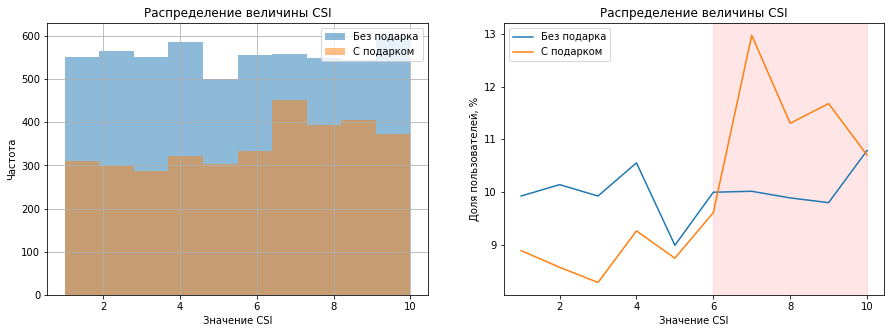

In [451]:
# Выведем на график распределение CSI
fig, axes = plt.subplots(1,2, figsize = (15,5))
data[data['giv_gift'] == 0]['csi'].hist(alpha = .5, ax = axes[0])
data[data['giv_gift'] == 1]['csi'].hist(alpha = .5, ax = axes[0])
axes[0].legend(['Без подарка', 'С подарком'])
axes[0].set_xlabel('Значение CSI')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение величины CSI')

# Вместо частоты используем долю пользователей с определенным CSI
rel_csi = data.pivot_table(index = 'csi', columns = 'giv_gift', values = 'id', aggfunc = 'count')
for i in range(len(rel_csi.columns)):
    rel_csi.iloc[:, :i+1] = (rel_csi.iloc[:, :i+1] / rel_csi.iloc[:, :i+1].sum()) * 100
rel_csi.plot(ax = axes[1])
axes[1].legend(['Без подарка', 'С подарком'])
axes[1].set_xlabel('Значение CSI')
axes[1].set_ylabel('Доля пользователей, %')
axes[1].set_title('Распределение величины CSI')
plt.axvspan(6, 10, color='red', alpha=0.1)

plt.show()

In [456]:
# Проверим статистически ли значима разница в CSI у пользователей с подарком и без
# Нулевая гипотеза = CSI равен в обеих группах
from scipy import stats as st
alpha = .05

results = st.ttest_ind(
    data[data['giv_gift'] == 0]['csi'], 
    data[data['giv_gift'] == 1]['csi'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1498336454037676e-06
Отвергаем нулевую гипотезу


<a id='Распределение CSI среди пользователей с учетом подарков'></a>
### Распределение CSI среди пользователей с учетом подарков
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>
CSI равномерно распределен среди пользователей, не получивших подарков, у пользователей, получивших подарки, наблюдается перевес в пользу высоких значений CSI (>6). По результатам тестирования мы видим, что отличия в CSI статистически значимы. Постараемся определить, какие атрибуты характерны для пользователей с высоким CSI 

In [ ]:
# Список атрибутов
cols = ['type', 'channel', 'product', 'days_to_sett', 'paid_in_full', 'age_bracket']

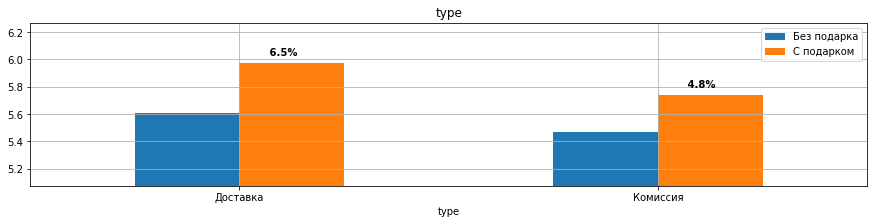

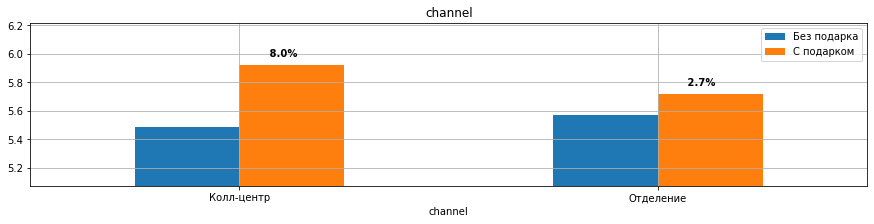

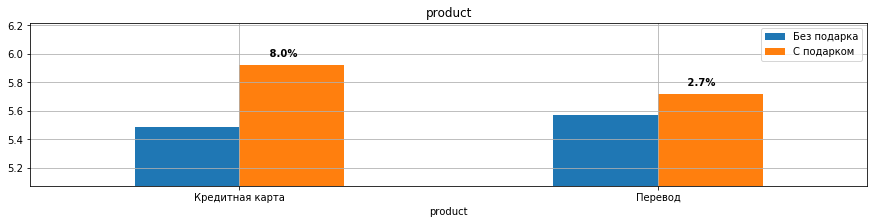

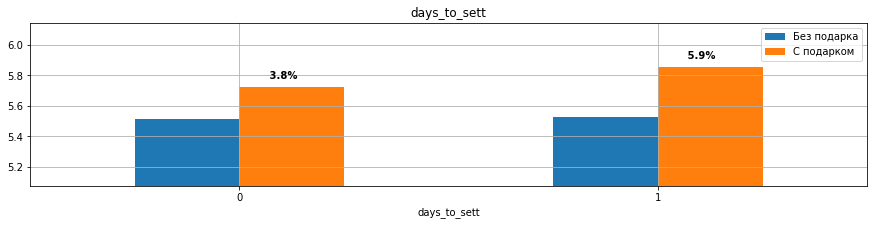

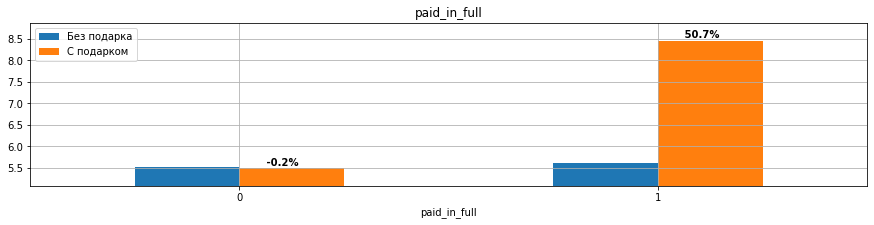

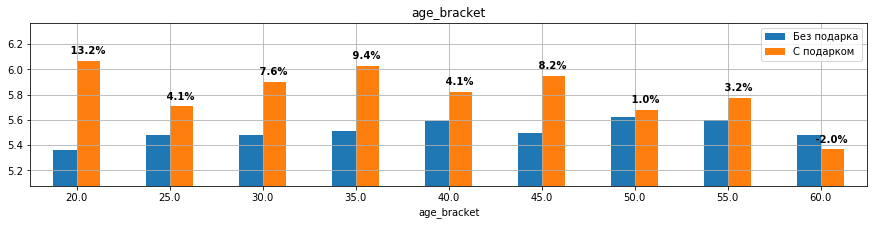

In [480]:
for i in cols:
    data.pivot_table(index= i, 
                     columns = 'giv_gift', 
                     aggfunc = 'mean', 
                     values = 'csi').plot.bar(figsize=(15,3), grid = True, rot = 0)
    
    plt.ylim(data.csi.mean() * .9)
    plt.title(i)
    plt.legend(['Без подарка', 'С подарком'])
    piv = data.pivot_table(index= i, 
                           columns = 'giv_gift', 
                           aggfunc = 'mean', 
                           values = 'csi')
    ch = round((piv[1] / piv[0] - 1) * 100, 1).tolist()
    ax = plt.gca()
    for patch in range(len(ax.patches)):
        if patch < len(ax.patches) / 2: continue
        else:
            cord = ax.patches[patch].get_xy()
            height = ax.patches[patch].get_height() * 1.01
            ax.text(cord[0] + .1, height, ' {}%'.format(ch.pop(0)), ha = 'center', weight = 'bold')
    plt.show()

<a id='Средний уровень CSI'></a>
### Средний уровень CSI
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>
Практически все наблюдения, в которых пользователи получили подарки, имеют CSI выше, чем в случаях без подарка.
Наибольшее отличие наблюдается среди пользователей, которым полностью выплатили компенсацию, среднее значение CSI выше на 50%.
Интересны отличия в уровне удовлетворенности в зависимости от различных атрибутов и реакции CSI на подарок. Так, обращения в кол-центр и по продукту "кредитная карта" реагируют на подарки лучше, чем обращения в отделение и по продукту "перевод"  

Посмотрим на не на средние значения, а на распределение интересующей переменной

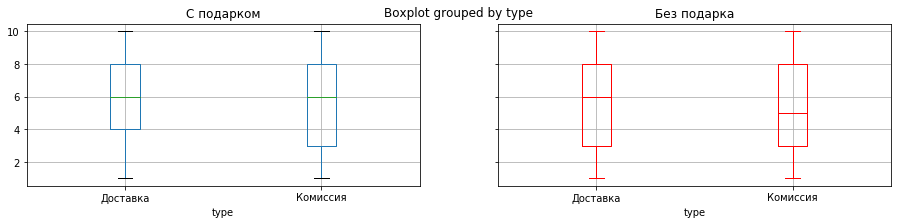

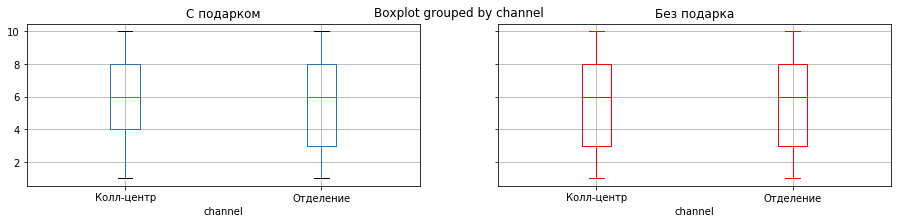

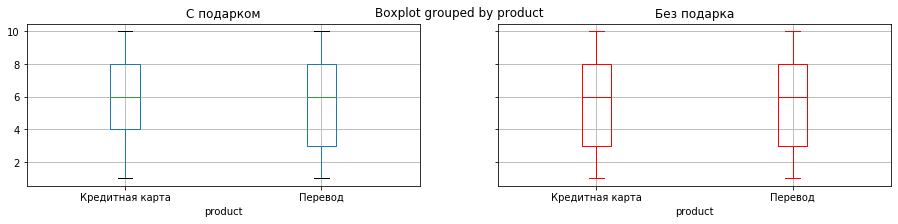

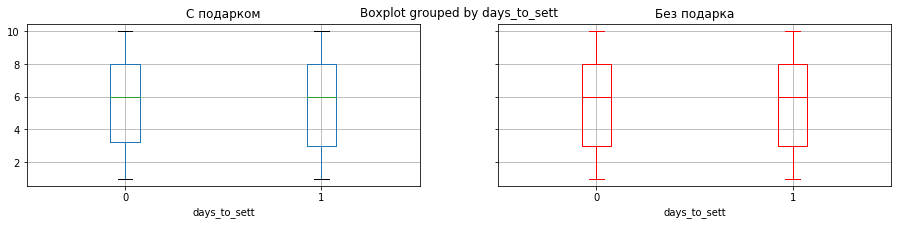

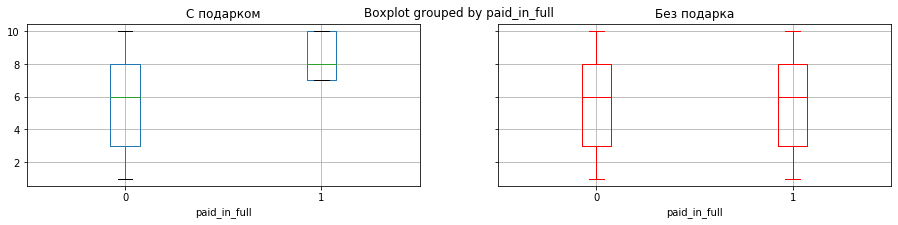

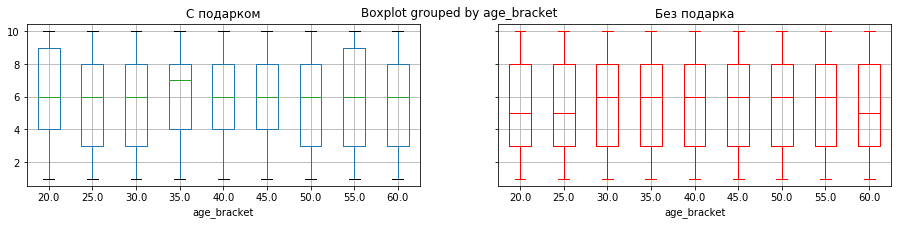

In [467]:
for i in cols:
    fig, axes = plt.subplots(1,2, sharey = True, figsize=(15,3))
    data[data['giv_gift'] == 1].boxplot('csi', by = i, ax = axes[0])
    axes[0].set_title('С подарком')
    data[data['giv_gift'] == 0].boxplot('csi', by = i, ax = axes[1], color = 'red')
    axes[1].set_title('Без подарка')
    plt.show()

<a id='Распределение CSI'></a>
### Распределение CSI
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>
В большинстве показателей медианное значение стабильно, при значениях атрибутов равных "доставка", "колл-центр", "кредитная карта" наличие подарка влияет только на наименьшие значения удовлетворенности, при этом сохраняя медианное значение.
Более благотворно на уровень удовлетворенности реагируют клиенты в возрасте до 30 лет.

Посмотрим как изменятся показатели без учета пользователей, которые получили подарок, и чья претензия была полностью удовлетворена

In [491]:
# Уберем из данных пользователей, которые получили подарок, и чья претензия удовлетворена в полном размере
pp = data[(data['giv_gift'] == 1) & (data['paid_in_full'] == 1)]
rest = data[~(data['id'].isin(pp.id))]

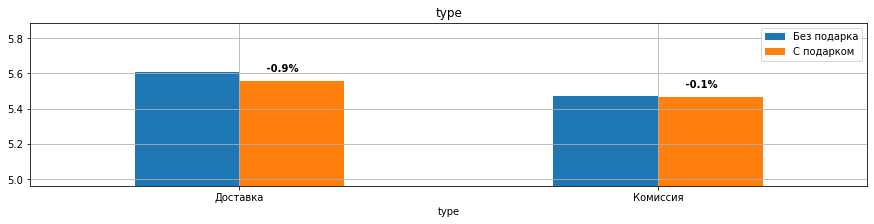

p-значение: 0.6306819642814041
Не получилось отвергнуть нулевую гипотезу Доставка type
p-значение: 0.919617715850678
Не получилось отвергнуть нулевую гипотезу Комиссия type


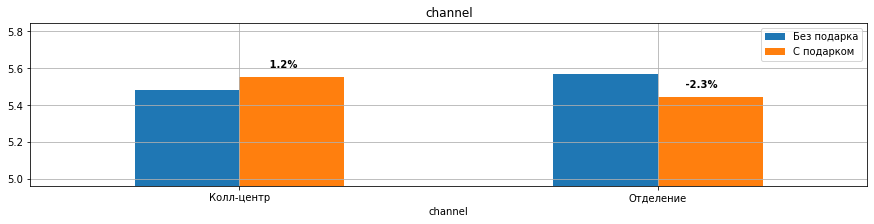

p-значение: 0.44966100988465674
Не получилось отвергнуть нулевую гипотезу Колл-центр channel
p-значение: 0.1774430841912634
Не получилось отвергнуть нулевую гипотезу Отделение channel


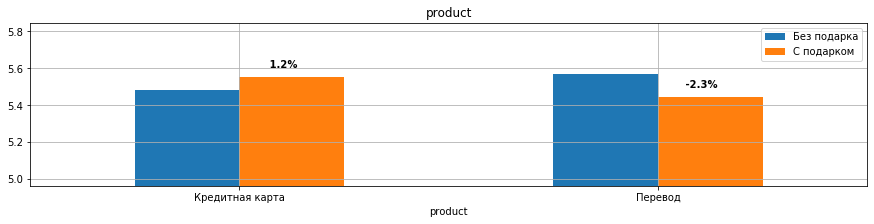

p-значение: 0.44966100988465674
Не получилось отвергнуть нулевую гипотезу Кредитная карта product
p-значение: 0.1774430841912634
Не получилось отвергнуть нулевую гипотезу Перевод product


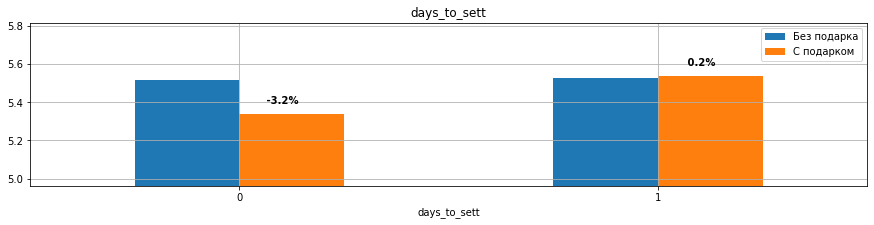

p-значение: 0.8645965008709976
Не получилось отвергнуть нулевую гипотезу 1 days_to_sett
p-значение: 0.21304930970639036
Не получилось отвергнуть нулевую гипотезу 0 days_to_sett


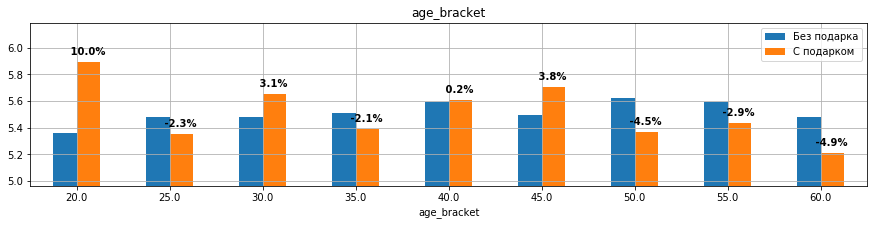

p-значение: 0.4691833642067019
Не получилось отвергнуть нулевую гипотезу 35.0 age_bracket
p-значение: 0.09067869298016835
Не получилось отвергнуть нулевую гипотезу 20.0 age_bracket
p-значение: 0.4604779721075013
Не получилось отвергнуть нулевую гипотезу 25.0 age_bracket
p-значение: 0.339079664878405
Не получилось отвергнуть нулевую гипотезу 30.0 age_bracket
p-значение: 0.9417157320785918
Не получилось отвергнуть нулевую гипотезу 40.0 age_bracket
p-значение: 0.15443682252511787
Не получилось отвергнуть нулевую гипотезу 50.0 age_bracket
p-значение: 0.24476187427598545
Не получилось отвергнуть нулевую гипотезу 45.0 age_bracket
p-значение: 0.5159218310053396
Не получилось отвергнуть нулевую гипотезу 55.0 age_bracket
p-значение: 0.3012506506125411
Не получилось отвергнуть нулевую гипотезу 60.0 age_bracket


In [495]:
for i in cols:
    if i == 'paid_in_full':
        continue
    rest.pivot_table(index= i, 
                     columns = 'giv_gift', 
                     aggfunc = 'mean', 
                     values = 'csi').plot.bar(figsize=(15,3), grid = True, rot = 0)
    
    plt.ylim(rest.csi.mean() * .9)
    plt.title(i)
    plt.legend(['Без подарка', 'С подарком'])
    piv = rest.pivot_table(index= i, 
                           columns = 'giv_gift', 
                           aggfunc = 'mean', 
                           values = 'csi')
    
    ch = round((piv[1] / piv[0] - 1) * 100, 1).tolist()
    ax = plt.gca()
    for patch in range(len(ax.patches)):
        if patch < len(ax.patches) / 2: continue
        else:
            cord = ax.patches[patch].get_xy()
            height = ax.patches[patch].get_height() * 1.01
            ax.text(cord[0] + .1, height, ' {}%'.format(ch.pop(0)), ha = 'center', weight = 'bold')
    plt.show()
    alpha = .05 / 17 #Корректировка для учета множественного сравнения 
    for y in rest[i].unique():    
        results = st.ttest_ind(
            rest[(rest['giv_gift'] == 0) & (rest[i] == y)]['csi'], 
            data[(data['giv_gift'] == 1) & (rest[i] == y)]['csi'],
            equal_var = True)

        print('p-значение:', results.pvalue)

        if (results.pvalue < alpha):
            print("Отвергаем нулевую гипотезу для", y, i)
        else:
            print("Не получилось отвергнуть нулевую гипотезу", y, i) 

<a id='Различия в CSI без учета пользователей, получивших подарок и полностью выплаченной компенсацией'></a>
### Различия в CSI без учета пользователей получивших подарок и полностью выплаченной компенсацией
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>
Без учета пользователей, которые получили подарок и чьи претензии были удовлетворены, реакция клиентов на подарок становится не так однозначна. В некоторых случаях средний CSI у них даже ниже, чем у клиентов без подарка. По результатам теста все различия оказались статистически не значимы, с крайне высокими уровнями критических значений.

<a id='Целесообразность использования подарков для поддержания лояльности клиентов'></a>
## Целесообразность использования подарков для поддержания лояльности клиентов
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>


In [153]:
# Используя структуру долей пользователей по уровню CSI, посмотрим на сколько выросло количество клиентов с удовлетворенностью выше 5
diff = rel_csi * len(data[data['giv_gift'] == 1]['csi']) / 100
diff['diff'] = diff[0] - diff[1]
round(diff, 2)

giv_gift,0,1,diff
csi,,,
1.0,345.01,309.0,36.01
2.0,352.51,298.0,54.51
3.0,345.01,288.0,57.01
4.0,366.89,322.0,44.89
5.0,312.51,304.0,8.51
6.0,347.51,334.0,13.51
7.0,348.14,451.0,-102.86
8.0,343.76,393.0,-49.24
9.0,340.64,406.0,-65.36


In [154]:
# Количество пользователей с CSI выше 5 относительно структуры без подарков
diff[diff['diff'] < 6]['diff'].sum()

-214.44939780693863

In [157]:
# Стоимость перевода одного пользователя
len(data[data['giv_gift'] == 1]['csi']) * 500 / diff[diff['diff'] < 6]['diff'].sum()

-8106.807562897012

In [503]:
data.giv_gift.sum()

3477

<a id='Выводы и рекомендации'></a>
## Выводы и рекомендации
<hr style="background-color: rgb(0,0,0);height: 3.0px;"/>

* Наибольший эффект на уровень удовлетворенности клиента подарки оказывают в случае, если финансовая претензия была удовлетворена в полном объеме. Средний CSI равен 8.5, против 5.5 у прочих пользователей
* В остальных случаях факт подарка не оказывает статистически значимого влияния на уровень удовлетворенности клиентов.  

Если принять за положительный эффект уровень клиентской удовлетворенности выше 5, то:  
* Из 3477 выданных подарков лишь у 214 достигается желаемый эффект  
* При этом стоимость повышения лояльности одного пользователя составляет 8.1 тыс. руб.  
Эта стоимость может быть экономически не целесообразной, необходимо учесть:  
* Стоимость привлечения клиентов,  
* Вероятность оттока в зависимости от уровня CSI,  
* Уровень сервиса и наличия альтернатив у конкурентов,  
* Количество пользователей, которые приходят по рекомендации удовлетворенных клиентов  

Оптимальным для банка была бы система предоставления подарка только пользователям, чьи финансовые претензии удовлетворены полностью. Это значительно увеличивает CSI и переводит таких клиентов в ранг promoter'ов.  

### Существенные ограничения данного анализа  
В ходе этой работы механизм отбора клиентов для получения подарков был неизвестен. Это накладывает существенные ограничения на выводы данного исследования. Если подарки предоставлялись клиентами с самыми проблемными случаями, в которых уровень удовлетворенности был бы значительно ниже, то эффект от подарков может оказаться значительно выше



* <a href='#Начало'>В начало</a>